In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading csv file
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
#shape of the dataset
tesla.shape

(2416, 7)

In [5]:
#info of the dataset
tesla.info()
# it shows there is no null values in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [9]:
#convertion of Dtype of 'Date' 
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [10]:
print(f'Dataset contains stock price information from {tesla.Date.min()} to {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataset contains stock price information from 2010-06-29 00:00:00 to 2020-02-03 00:00:00
Total Days = 3506 days


In [11]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [12]:
# No. of columns in dataset
tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
# checking for duplicatevalue
tesla.duplicated().value_counts()

False    2416
dtype: int64

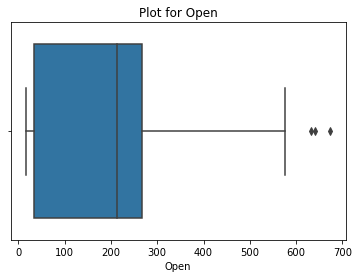

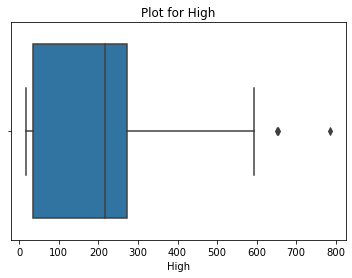

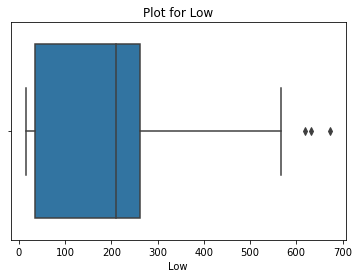

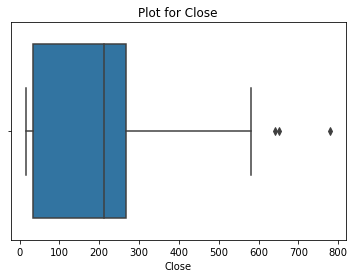

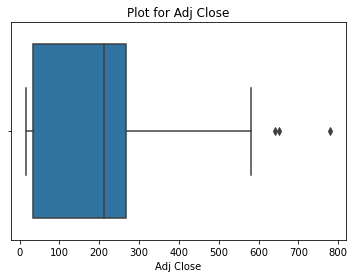

In [24]:
#checking for an outlier
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
for i in col:
    plt.figure()
    sns.boxplot(tesla[i])
    plt.title(f'Plot for {i}')

<AxesSubplot:>

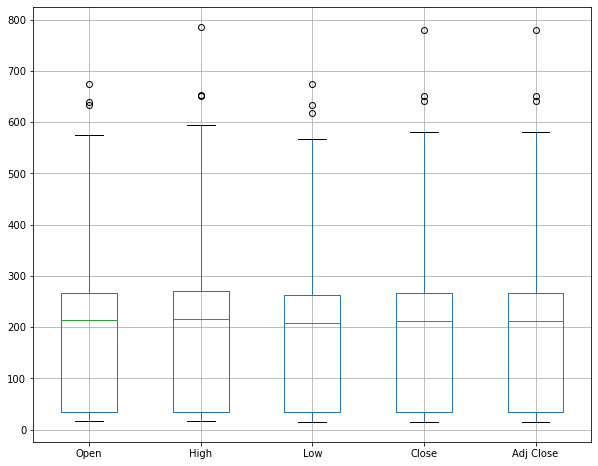

In [31]:
#checking for an outlier
box = pd.DataFrame(tesla, columns=['Open', 'High', 'Low', 'Close', 'Adj Close'])
plt.figure(figsize=(10,8))
box.boxplot()

###  From the above box plot it can be seen that values that are more than 600 is treated as outlier

In [59]:
#Removing the outlier
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
for i in col:
    print('\n')
    print(f'Inter Quartile Range for {i}')
    Q1 = np.percentile(tesla[i], 25, interpolation='midpoint')
    Q3 = np.percentile(tesla[i], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    print('Permissioble limit for %s is %.2f to %.2f'%(i,LL,UL))   



Inter Quartile Range for Open
Permissioble limit for Open is -313.84 to 614.62


Inter Quartile Range for High
Permissioble limit for High is -319.17 to 625.00


Inter Quartile Range for Low
Permissioble limit for Low is -309.19 to 604.88


Inter Quartile Range for Close
Permissioble limit for Close is -314.17 to 615.35


Inter Quartile Range for Adj Close
Permissioble limit for Adj Close is -314.17 to 615.35


In [65]:
tesla[tesla['Open'] >= 614.62]

,Date,Open,High,Low,Close,Adj Close,Volume
2413,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000


In [67]:
tesla[tesla['High'] >= 625.00]

,Date,Open,High,Low,Close,Adj Close,Volume
2413,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000


In [68]:
tesla[tesla['Low'] >= 604.88]

,Date,Open,High,Low,Close,Adj Close,Volume
2413,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000


In [69]:
tesla[tesla['Close'] >= 615.35]

,Date,Open,High,Low,Close,Adj Close,Volume
2413,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000


In [70]:
tesla[tesla['Adj Close'] >= 615.35]

,Date,Open,High,Low,Close,Adj Close,Volume
2413,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000


### from the above it can seen that idex number 2413, 2414 & 2415 having commomn outlier

In [73]:
# Removing the outliers
new_tesla = tesla.drop([2413, 2414, 2415])

<AxesSubplot:>

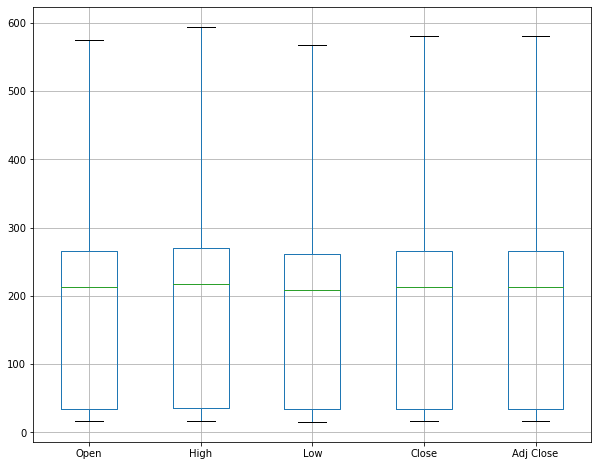

In [80]:
box = pd.DataFrame(new_tesla, columns=['Open', 'High', 'Low', 'Close', 'Adj Close'])
plt.figure(figsize=(10,8))
box.boxplot()

Text(0.5, 1.0, 'TESLA')

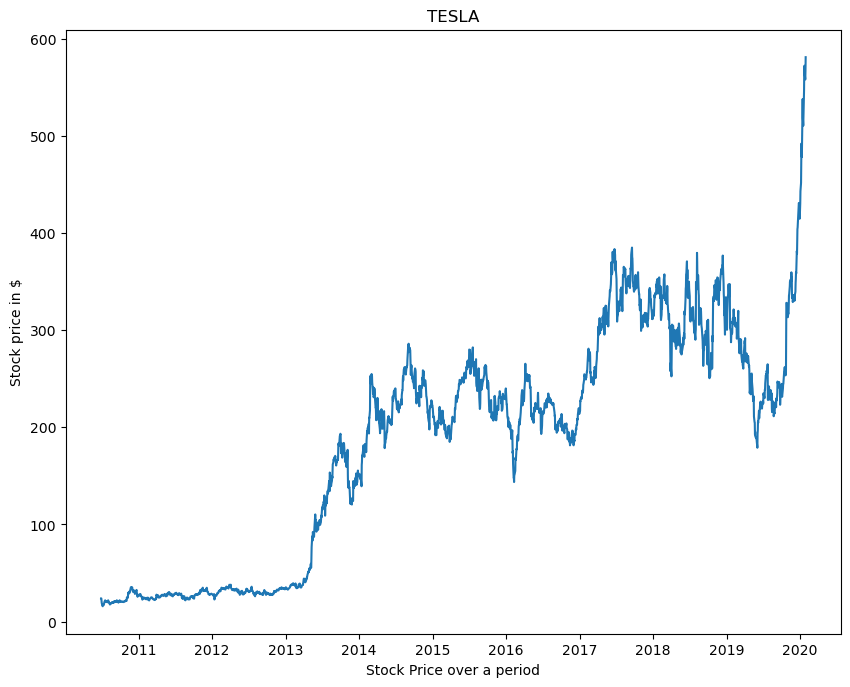

In [101]:
plt.figure(figsize=(10,8), dpi=100)
sns.lineplot(x=new_tesla['Date'], y=new_tesla['Close'])
plt.xlabel("Stock Price over a period")
plt.ylabel("Stock price in $")
plt.title("TESLA")


### Stcok Prices showing an uptrend

In [112]:
new_tesla[new_tesla['Close'] == new_tesla['Adj Close']].shape

(2413, 7)

### Values in athe column 'Close' is same as value in column 'Adj Close'

In [116]:
# as values of 'Close' & 'Adj Cliose' are same one of the column is droping
new_tesla = new_tesla.drop(['Adj Close'], axis=1)

In [117]:
new_tesla

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2408,2020-01-23,564.250000,582.000000,555.599976,572.200012,19651000
2409,2020-01-24,570.630005,573.859985,554.260010,564.820007,14353600
2410,2020-01-27,541.989990,564.440002,539.280029,558.020020,13608100
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500


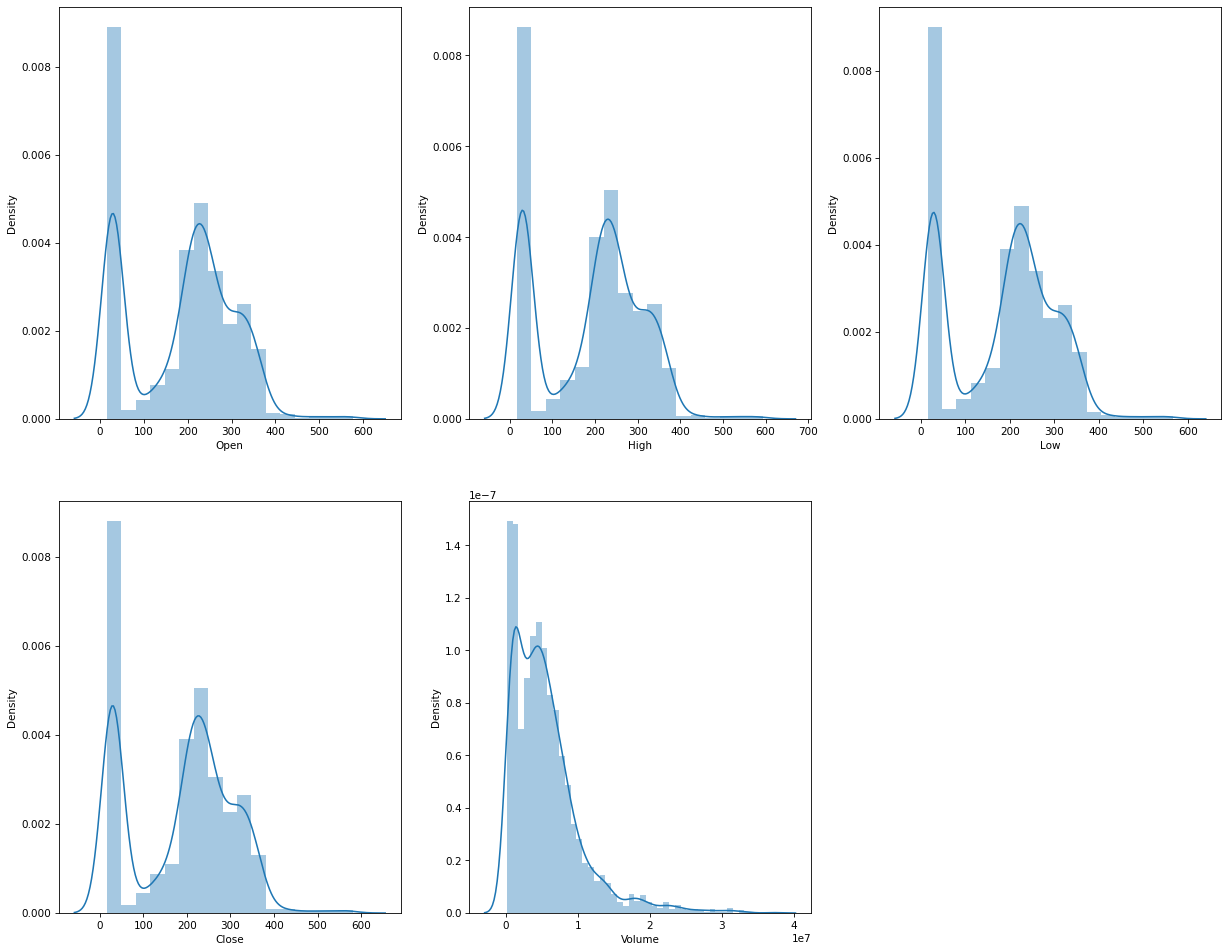

In [152]:
col = new_tesla.columns[1:]
plt.figure(figsize=(20,16), dpi=75)
for i, c in enumerate(col):
    plt.subplot(2,3,i+1)
    sns.distplot(new_tesla[c])

<AxesSubplot:>

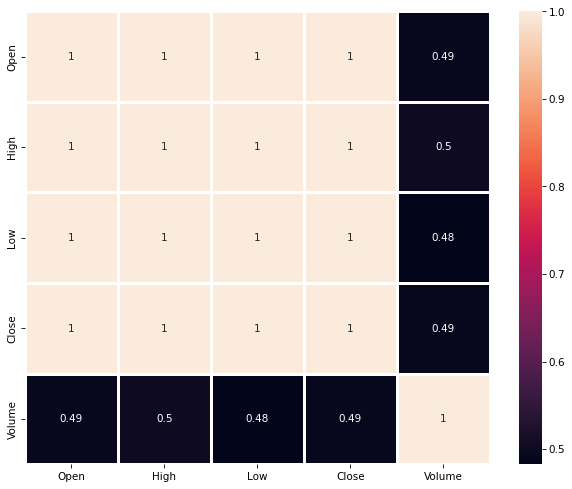

In [169]:
plt.figure(figsize=(10,8), dpi=75)
sns.heatmap(new_tesla.corr(), annot=True, linewidths=1)

In [173]:
# splitting the dataset
X = np.array(new_tesla.index).reshape(-1,1)
Y = new_tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.75, random_state=3)

In [174]:
# Feature Scaling
scaler = StandardScaler().fit(X_train)

In [176]:
# Creating Linear model
linear_model = LinearRegression()

In [181]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [189]:
print("Performamnce of Train dataset: %0.3f" %(linear_model.score(X_train, Y_train)))
print("Performamnce of Test dataset: %0.3f" %(linear_model.score(X_test, Y_test)))

Performamnce of Train dataset: 0.797
Performamnce of Test dataset: 0.798


In [190]:
# Y Train data prediction
Pred_Y_train = linear_model.predict(X_train)

# Y Test data prediction
Pred_Y_test = linear_model.predict(X_test)

In [198]:
# Mean Absolute Error
print("For Train data: %0.2f"%(mean_absolute_error(Y_train, Pred_Y_train)))
print("For Test data: %0.2f"%(mean_absolute_error(Y_test, Pred_Y_test)))

For Train data: 42.08
For Test data: 41.38


In [199]:
# Mean Squared Error
print("For Train data: %0.2f"%(mean_squared_error(Y_train, Pred_Y_train)))
print("For Test data: %0.2f"%(mean_squared_error(Y_test, Pred_Y_test)))

For Train data: 2834.76
For Test data: 2752.01


In [200]:
# Root Mean Squared Error
print("For Train data: %0.2f"%(mean_squared_error(Y_train, Pred_Y_train, squared=False)))
print("For Test data: %0.2f"%(mean_squared_error(Y_test, Pred_Y_test, squared=False)))

For Train data: 53.24
For Test data: 52.46


In [202]:
#R2_Score
print("For Train data: %0.3f"%(r2_score(Y_train, Pred_Y_train)))
print("For Test data: %0.3f"%(r2_score(Y_test, Pred_Y_test)))

For Train data: 0.797
For Test data: 0.798


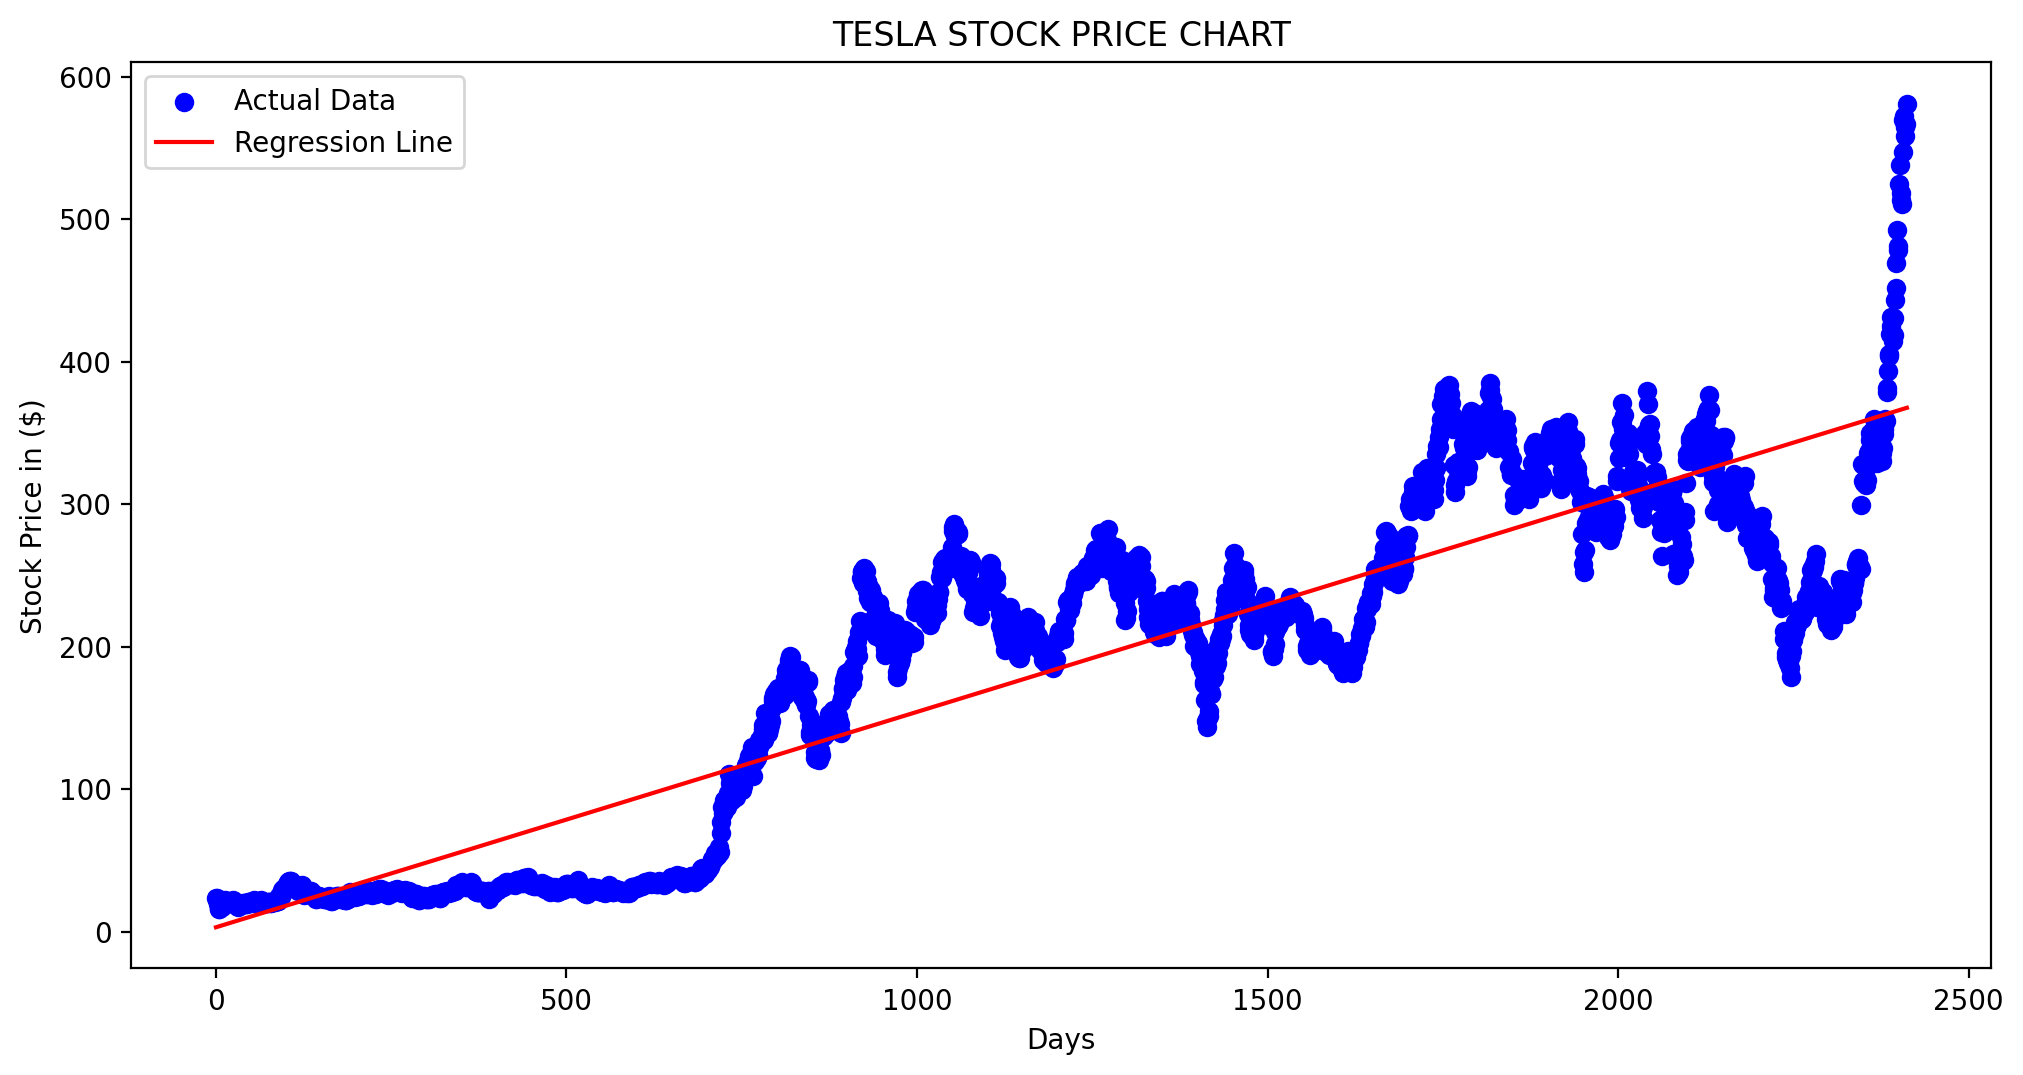

In [211]:
# Visualize the Actual and Predicted data
Pred = linear_model.predict(X)
plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X, Y, color = 'blue', label = 'Actual Data')
plt.plot(X, Pred, color = 'red', label = 'Regression Line')
plt.xlabel('Days')
plt.ylabel('Stock Price in ($)')
plt.title("TESLA STOCK PRICE CHART")
plt.legend()